<a href="https://colab.research.google.com/github/davidbrown2324/Colabratory_Workshop/blob/master/2nd_Colab_Notebook_View_Image_Channels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Use the ! to call a command line rather than a python command
#This will install scikit-learn
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.21.3)


In [0]:
#This will install scikit-image
!pip install -U scikit-image

     |████████████████████████████████| 26.5MB 89kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scikit-image 0.15.0
    Uninstalling scikit-image-0.15.0:
      Successfully uninstalled scikit-image-0.15.0


In [0]:
#This will install mahotas
!pip install -U mahotas

     |████████████████████████████████| 1.5MB 4.9MB/s 
  Created wheel for mahotas: filename=mahotas-1.4.8-cp36-cp36m-linux_x86_64.whl size=4263951 sha256=615fb4c34b3af315e5ce82bcf9f7100e3cae76003c354790b3f045b27645263a
  Stored in directory: /root/.cache/pip/wheels/3e/8b/93/690deca49a46242df274db70dbef26c0a6fa86e378b677e1ab
Successfully built mahotas


In [0]:
#https://www.marktechpost.com/2019/06/07/how-to-connect-google-colab-with-google-drive/
#Start by connecting gdrive into the google colab
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!ls "/content/gdrive/My Drive/Colab_Notebooks"

1st_Colab_Notebook.ipynb  Well07_012.tif  Well07_012_z4.tif


In [0]:
import time
import os
import glob
import matplotlib.pyplot as plt
%matplotlib inline

import skimage.io as io
io.use_plugin('tifffile')
import mahotas as mh
import numpy as np
from skimage.morphology import disk
from skimage.filters import threshold_otsu, rank, gaussian
from scipy.ndimage import morphology, median_filter
from skimage.morphology import watershed
from skimage.segmentation import clear_border
from skimage.filters import sobel

In [0]:
#[1] Get targeted filelist
path="gdrive/My Drive/Colab_Notebooks/"
#In Python 3.5 and newer use the new recursive **/ functionality:

target='.tif'

filelist=glob.glob(path+str('*')+target)

In [0]:
filelist

['gdrive/My Drive/Colab_Notebooks/Well07_012.tif',
 'gdrive/My Drive/Colab_Notebooks/Well07_012_z4.tif']

In [0]:
tif_file=filelist[-1]

im=io.imread(tif_file)

In [0]:
im.shape

(512, 512, 4)

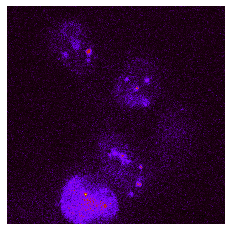

In [0]:
#Try showing the 1st channel
plt.imshow(im[:,:,0], cmap='gnuplot');
plt.axis('off');

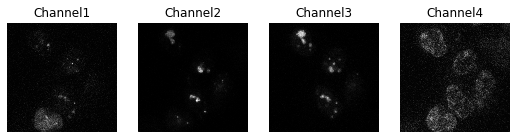

In [0]:
#Lets plot every channel
fig, axes = plt.subplots(ncols=4, figsize=(9, 9), sharex=True, sharey=True)
ax = axes.ravel()

for i in range(im.shape[2]):
  ax[i].imshow(im[:,:,i], cmap=plt.cm.gray)
  ax[i].set_title('Channel'+str(i+1));
  ax[i].axis('off');